<a href="https://colab.research.google.com/github/moriyaco3/pytorch/blob/main/PyTorch_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# we would like to generate 20 data points
N = 20

# random data on the x-axis in (-5, +5)
X = np.random.random(N)*10 - 5

# a line plus some noise
Y = 0.5 * X - 1 + np.random.randn(N)

# you'll have to take my "in-depth" series to understand
# why this is the CORRECT model to use with our MSE loss

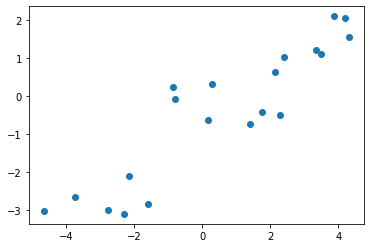

In [6]:
# Plot the data
plt.scatter(X, Y);

In [7]:
# Create the linear regression model
model = nn.Linear(1, 1)

In [8]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

In [9]:
# In ML we want our data to be of shape:
# (num_samples x num_dimensions)
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

# PyTorch uses float32 by default
# Numpy creates float64 by default
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [10]:
type(inputs)

torch.Tensor

In [11]:
# Train the model
n_epochs = 30
losses = []
for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # keep the loss so we can plot it later
  losses.append(loss.item())
    
  # Backward and optimize
  loss.backward()
  optimizer.step()
    
  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/30, Loss: 2.7035
Epoch 2/30, Loss: 2.2926
Epoch 3/30, Loss: 1.9686
Epoch 4/30, Loss: 1.7042
Epoch 5/30, Loss: 1.4880
Epoch 6/30, Loss: 1.3111
Epoch 7/30, Loss: 1.1665
Epoch 8/30, Loss: 1.0481
Epoch 9/30, Loss: 0.9513
Epoch 10/30, Loss: 0.8722
Epoch 11/30, Loss: 0.8074
Epoch 12/30, Loss: 0.7544
Epoch 13/30, Loss: 0.7111
Epoch 14/30, Loss: 0.6757
Epoch 15/30, Loss: 0.6467
Epoch 16/30, Loss: 0.6230
Epoch 17/30, Loss: 0.6036
Epoch 18/30, Loss: 0.5877
Epoch 19/30, Loss: 0.5747
Epoch 20/30, Loss: 0.5641
Epoch 21/30, Loss: 0.5554
Epoch 22/30, Loss: 0.5483
Epoch 23/30, Loss: 0.5425
Epoch 24/30, Loss: 0.5378
Epoch 25/30, Loss: 0.5339
Epoch 26/30, Loss: 0.5307
Epoch 27/30, Loss: 0.5281
Epoch 28/30, Loss: 0.5260
Epoch 29/30, Loss: 0.5243
Epoch 30/30, Loss: 0.5228


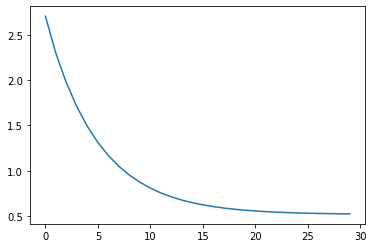

In [12]:
# Plot the loss per iteration
plt.plot(losses);

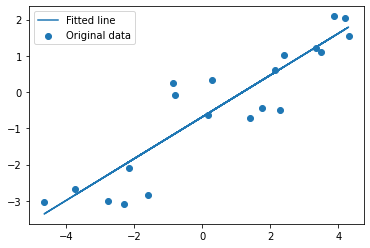

In [13]:
# Plot the graph
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y, label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

In [14]:
# Error!
model(inputs).numpy()

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [15]:
# Another way
with torch.no_grad():
  out = model(inputs).numpy()
out

array([[ 0.12549627],
       [-0.5932773 ],
       [-1.9176484 ],
       [-2.8379269 ],
       [ 0.62937117],
       [-0.5142611 ],
       [ 0.694432  ],
       [ 0.31772828],
       [ 1.2394067 ],
       [ 1.7895077 ],
       [ 1.3227094 ],
       [ 1.5439392 ],
       [-3.359055  ],
       [-1.1419618 ],
       [-1.1772788 ],
       [ 0.5455303 ],
       [-2.0023382 ],
       [ 1.7323204 ],
       [-2.2845566 ],
       [-1.6077602 ]], dtype=float32)

In [16]:
# Important!
# In order to test the efficacy of our model, synthetic data is useful
# Why?
# Because ***we know the answer***
# True values of (w, b) are (0.5, -1)
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[0.5760499]] [-0.68661153]
